In [2]:
import numpy as np
import pandas as pd
import json
import keras
from keras import layers
import random
import sys
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [3]:
reviews = pd.read_json('./data/Office_Products_5.json',lines=True)

In [4]:
reviews.count()

overall           800357
verified          800357
reviewTime        800357
reviewerID        800357
asin              800357
style             501427
reviewerName      800217
reviewText        800144
summary           800228
unixReviewTime    800357
vote               88817
image              11302
dtype: int64

In [3]:
reviews.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [4]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,NaN,NaN
1,4,True,"03 7, 2017",A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,Bought this used and it came in great conditio...,Good,1488844800,NaN,NaN
2,5,True,"06 25, 2016",APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,NaN,NaN
3,5,True,"02 21, 2016",A2DHERRZIPFU7X,0140503528,{'Format:': ' Paperback'},Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,1456012800,NaN,NaN
4,5,False,"08 2, 2015",A2XCLJRGFANRC,0140503528,{'Format:': ' Hardcover'},E. Ervin,Having spent numerous years in an elementary s...,Love Corduroy,1438473600,NaN,NaN


In [5]:
reviews['reviewTimeAsDate'] = pd.to_datetime(reviews['reviewTime'])
#reviews['reviewTime'] = reviews['reviewTime'].astype('datetime64[ns]', format='%y')

In [6]:
reviews.groupby('overall').count()

,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,reviewTimeAsDate
overall,,,,,,,,,,,,
1,31697,31697,31697,31697,17306,31687,31697,31695,31697,9710,1016,31697
2,24076,24076,24076,24076,14115,24068,24074,24072,24076,5302,550,24076
3,50702,50702,50702,50702,30772,50692,50700,50701,50702,8466,780,50702
4,122889,122889,122889,122889,76748,122868,122864,122864,122889,15160,1921,122889
5,570993,570993,570993,570993,362486,570902,570809,570896,570993,50179,7035,570993


In [5]:
reviews.groupby('verified').count()

,overall,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
verified,,,,,,,,,,,
False,90170,90170,90170,90170,55313,90137,90157,90162,90170,17200,2983
True,710187,710187,710187,710187,446114,710080,709987,710066,710187,71617,8319


In [6]:
reviews.groupby(['overall','verified']).count()

reviewTime  reviewerID    asin   style  reviewerName  \
overall verified                                                         
1       False           5753        5753    5753    2584          5750   
        True           25944       25944   25944   14722         25937   
2       False           3744        3744    3744    1931          3744   
        True           20332       20332   20332   12184         20324   
3       False           7402        7402    7402    4267          7399   
        True           43300       43300   43300   26505         43293   
4       False          19759       19759   19759   12164         19755   
        True          103130      103130  103130   64584        103113   
5       False          53512       53512   53512   34367         53489   
        True          517481      517481  517481  328119        517413   

                  reviewText  summary  unixReviewTime   vote  image  
overall verified                                                     
1       False           5753     5753            5753   2362    127  
        True           25944    25942           25944   7348    889  
2       False           3744     3743            3744   1196    108  
        True           20330    20329           20332   4106    442  
3       False           7401     7402            7402   1778    154  
        True           43299    43299           43300   6688    626  
4       False          19755    19759           19759   3722    631  
        True          103109   103105          103130  11438   1290  
5       False          53504    53505           53512   8142   1963  
        True          517305   517391          517481  42037   5072

In [8]:
reviews.groupby('asin').count().reset_index().sort_values('overall',ascending=False)

,asin,overall,verified,reviewTime,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
6063,B0010JEJPC,2269,2269,2269,2269,2253,2269,2269,2269,2269,150,4
1380,B00006IEEV,2258,2258,2258,2258,2245,2257,2257,2257,2258,250,85
6694,B0015ASS3U,2156,2156,2156,2156,2156,2156,2156,2154,2156,170,38
5988,B000ZHB2HS,2075,2075,2075,2075,2051,2075,2075,2075,2075,124,42
15158,B00A89YZ6S,1915,1915,1915,1915,0,1915,1913,1915,1915,59,15
...,...,...,...,...,...,...,...,...,...,...,...,...
7139,B0017L3D1E,1,1,1,1,0,1,1,1,1,1,0
5713,B000X45MR4,1,1,1,1,1,1,1,1,1,0,0
6867,B001666OQQ,1,1,1,1,0,1,1,1,1,0,0
5757,B000XDWJDA,1,1,1,1,0,1,1,1,1,0,0


In [11]:
reviews.groupby('reviewerID').count().reset_index().sort_values('overall',ascending=False)

,reviewerID,overall,verified,reviewTime,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
75758,A3TTVIQ9RRHNIB,323,323,323,323,160,323,323,323,323,2,0
72069,A3OXHLG6DIBRW8,282,282,282,282,157,282,282,282,282,79,0
70784,A3N77PJ4KP3CJP,251,251,251,251,145,251,251,251,251,0,0
98485,AVU1ILDDYW301,218,218,218,218,136,218,218,218,218,20,0
83782,AC5HC2TJVWOFT,191,191,191,191,173,191,191,191,191,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3200,A14B96TJGWOWJS,4,4,4,4,2,4,4,4,4,1,0
75162,A3T0NHH5K0DMKQ,4,4,4,4,1,4,4,4,4,0,0
12481,A1GWP3TK35V54N,4,4,4,4,2,4,4,4,4,0,0
5111,A16W21USB3M8MK,4,4,4,4,2,4,4,4,4,0,0


In [18]:
reviews['reviewText'].str.len().mean()

240.62290162770702

In [19]:
reviews['reviewText'].str.len().max()

32602.0

In [7]:
reviews['reviewText'].str.len().min()

1.0

In [8]:
reviews['reviewText'].str.len()

0          94.0
1         220.0
2         267.0
3         511.0
4         754.0
          ...  
800352     37.0
800353     13.0
800354    698.0
800355      5.0
800356     60.0
Name: reviewText, Length: 800357, dtype: float64

In [9]:
review_lengths = reviews[['overall','reviewText']]

In [10]:
review_lengths['review_length'] = review_lengths['reviewText'].str.len()

<ipython-input-10-a76ff2fdf7fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_lengths['review_length'] = review_lengths['reviewText'].str.len()


In [11]:
review_lengths

,overall,reviewText,review_length
0,4,kids like story BUT while i really wanted a bo...,94.0
1,4,Bought this used and it came in great conditio...,220.0
2,5,Every story and book about Corduroy is Fantast...,267.0
3,5,I purchased this book for my first grade class...,511.0
4,5,Having spent numerous years in an elementary s...,754.0
...,...,...,...
800352,5,Delivered on time and is as expected.,37.0
800353,5,worked great.,13.0
800354,5,I used to score free UPS 4x6 labels. The blac...,698.0
800355,5,great,5.0


In [14]:
review_lengths[(review_lengths['overall']==5) & (review_lengths['review_length'] < 20.0)]

,overall,reviewText,review_length
6,5,Love this book,14.0
9,5,What I needed,13.0
11,5,Bought for a gift,17.0
12,5,Wonderful,9.0
15,5,Very sturdy,11.0
...,...,...,...
800304,5,As advertised.,14.0
800337,5,Thank you,9.0
800349,5,Works as expected,17.0
800353,5,worked great.,13.0


In [49]:
review_len_by_rating = review_lengths.groupby('overall')['review_length'].mean().reset_index()
review_len_by_rating

,overall,review_length
0,1,381.628671
1,2,395.884190
2,3,348.229389
3,4,333.646194
4,5,196.664094


Text(0.5, 0, 'Rating')

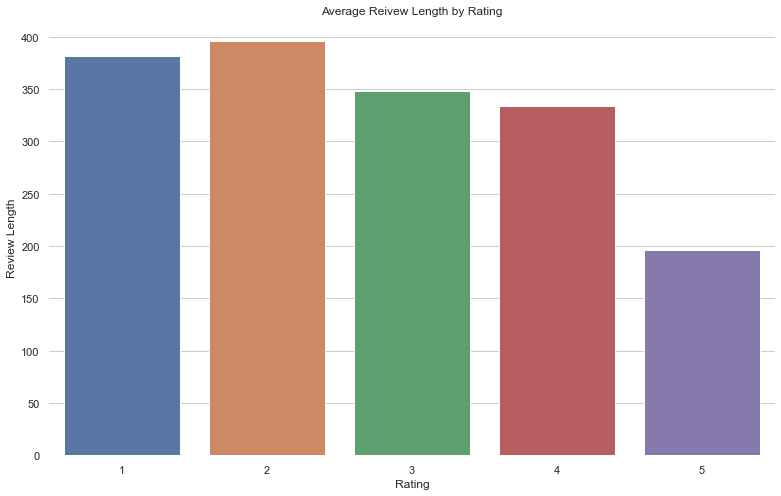

In [177]:
fix, ax = plt.subplots(figsize=(13,8))
sns.set_theme(style="whitegrid")
sns.despine(bottom=True, left=True)
ax = sns.barplot(x="overall", y="review_length", data=review_len_by_rating)
ax.set_title('Average Reivew Length by Rating')
ax.set_ylabel('Review Length')
ax.set_xlabel('Rating')

In [61]:
count_by_overall_verified = reviews.groupby(['overall','verified']).count()[['reviewTime']].reset_index().rename(columns={'reviewTime':'count'})

In [62]:
count_by_overall_verified

,overall,verified,count
0,1,False,5753
1,1,True,25944
2,2,False,3744
3,2,True,20332
4,3,False,7402
5,3,True,43300
6,4,False,19759
7,4,True,103130
8,5,False,53512
9,5,True,517481


Text(0, 0.5, 'Number of Reviews')

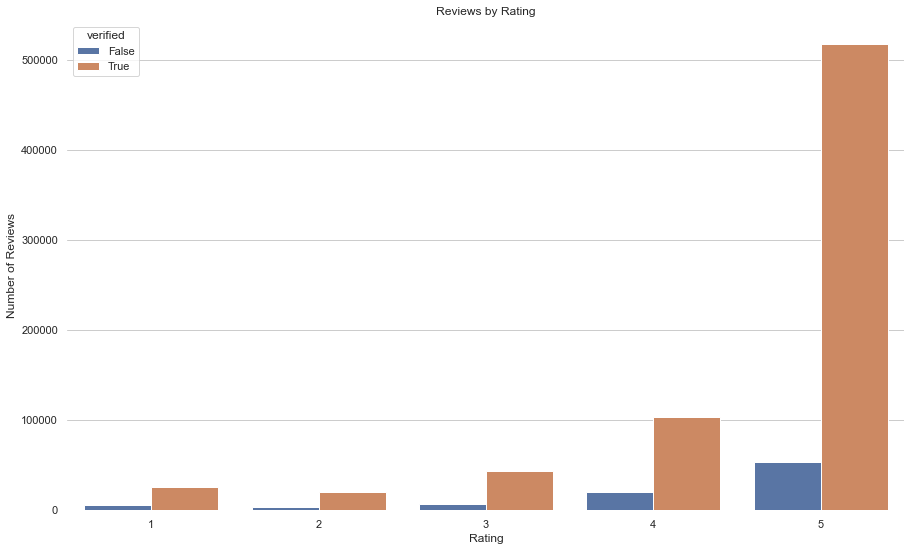

In [176]:
fix, ax = plt.subplots(figsize=(15,9))
#sns.set_theme(style="whitegrid")
sns.despine(bottom=True, left=True)
ax = sns.barplot(x="overall", y="count", hue="verified", data=count_by_overall_verified)
ax.set_title('Reviews by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Reviews')

In [74]:
num_reviews_by_products = reviews.groupby('asin').count().reset_index()[['asin','overall']].rename(columns={'overall':'count'})

In [81]:
num_reviews_by_products['review_level'] = pd.cut(num_reviews_by_products['count'], 
                                                 bins=[0,10,100,500,2500],
                                                labels=['rare','sometimes','often','frequent'])
num_reviews_by_products

,asin,count,review_level
0,0140503528,11,sometimes
1,0310432065,15,sometimes
2,0310520347,22,sometimes
3,0310802636,19,sometimes
4,0310806607,16,sometimes
...,...,...,...
27960,B01HH8E2QA,10,rare
27961,B01HHLLLIO,5,rare
27962,B01HI60F6C,5,rare
27963,B01HIL946E,5,rare


In [84]:
num_reviews_by_products.groupby('review_level')[['count']].count().reset_index()

,review_level,count
0,rare,13401
1,sometimes,13198
2,often,1264
3,frequent,102


In [161]:
reviews_by_year = reviews.groupby(reviews['reviewTimeAsDate'].dt.year)[['overall']].count().reset_index().rename(columns={'overall':'count',
                                                                                                                         'reviewTimeAsDate':'year'})

reviews_by_year['year'] = pd.to_datetime(reviews_by_year['year'], format='%Y')

In [106]:
reviews_by_year

,year,count
0,1999,1
1,2000,104
2,2001,109
3,2002,153
4,2003,183
5,2004,266
6,2005,414
7,2006,739
8,2007,1686
9,2008,3053


Text(0, 0.5, 'Number of Reviews')

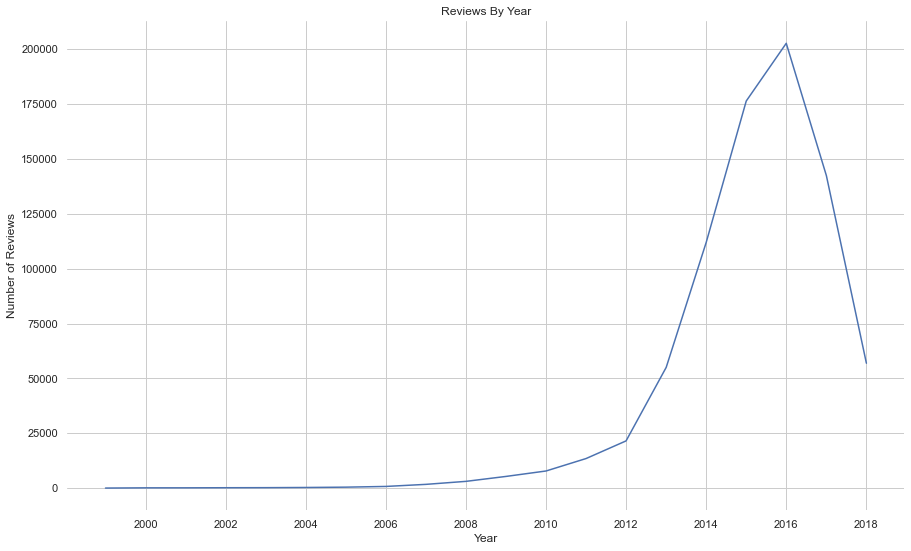

In [174]:
fix, ax = plt.subplots(figsize=(15,9))
sns.set_theme(style="whitegrid")
sns.despine(bottom=True, left=True)
ax = sns.lineplot(data=reviews_by_year, x="year", y="count")
ax.set_title('Reviews By Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')

In [163]:
max(reviews['reviewTimeAsDate'])

Timestamp('2018-10-02 00:00:00')

In [6]:
# df.groupby([df['birthdate'].dt.year.rename('year'), df['birthdate'].dt.month.rename('month')]).agg({'count'})
# df['birthdate'].groupby(df.birthdate.dt.to_period("M")).agg('count')
reviews_by_mon_year = reviews.groupby([reviews['reviewTimeAsDate'].dt.year.rename('year'),
                 reviews['reviewTimeAsDate'].dt.month.rename('month')]).count().reset_index()[['year','month','overall']]

In [7]:
reviews_by_mon_year['date'] = pd.to_datetime(reviews_by_mon_year[['year', 'month']].assign(DAY=1))
reviews_by_mon_year

,year,month,overall,date
0,1999,10,1,1999-10-01
1,2000,2,1,2000-02-01
2,2000,3,4,2000-03-01
3,2000,4,5,2000-04-01
4,2000,5,20,2000-05-01
...,...,...,...,...
221,2018,6,3916,2018-06-01
222,2018,7,2748,2018-07-01
223,2018,8,1513,2018-08-01
224,2018,9,451,2018-09-01


In [8]:
reviews_by_mon_year[(reviews_by_mon_year['year']>2013) & (reviews_by_mon_year['date'] < '2018-09-01')]

,year,month,overall,date
168,2014,1,7109,2014-01-01
169,2014,2,6330,2014-02-01
170,2014,3,6885,2014-03-01
171,2014,4,5681,2014-04-01
172,2014,5,5998,2014-05-01
173,2014,6,6205,2014-06-01
174,2014,7,11261,2014-07-01
175,2014,8,12278,2014-08-01
176,2014,9,12256,2014-09-01
177,2014,10,12175,2014-10-01


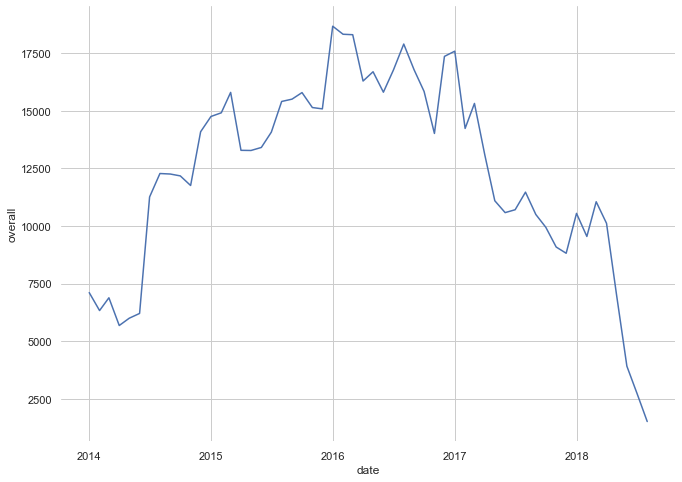

In [159]:
fix, ax = plt.subplots(figsize=(11,8))
sns.set_theme(style="whitegrid")
sns.despine(bottom=True, left=True)
ax = sns.lineplot(data=reviews_by_mon_year[(reviews_by_mon_year['year']>2013) & (reviews_by_mon_year['date'] < '2018-09-01')],
                  x="date", y="overall")

In [150]:
reviews_by_year.dtypes

year     datetime64[ns]
count             int64
dtype: object

In [158]:
reviews_by_year[(reviews_by_year['year']>'2013') & (reviews_by_year['year'] < '2018')]

,year,count
15,2014-01-01,112027
16,2015-01-01,176442
17,2016-01-01,202761
18,2017-01-01,142430


In [165]:
reviews_by_mon_year[(reviews_by_mon_year['year']==2018)]

,year,month,overall,date
216,2018,1,10548,2018-01-01
217,2018,2,9546,2018-02-01
218,2018,3,11053,2018-03-01
219,2018,4,10115,2018-04-01
220,2018,5,7014,2018-05-01
221,2018,6,3916,2018-06-01
222,2018,7,2748,2018-07-01
223,2018,8,1513,2018-08-01
224,2018,9,451,2018-09-01
225,2018,10,6,2018-10-01


In [20]:
np.zeros((3,60,3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0